## Task 1b: Build a logistic regression model 

Using the dataset “student_data.csv,” write code to (1) create a visualization of the data, (2) fit a model using logistic regression, (3) output model coefficients and performance metrics such as accuracy and AUC and ROC


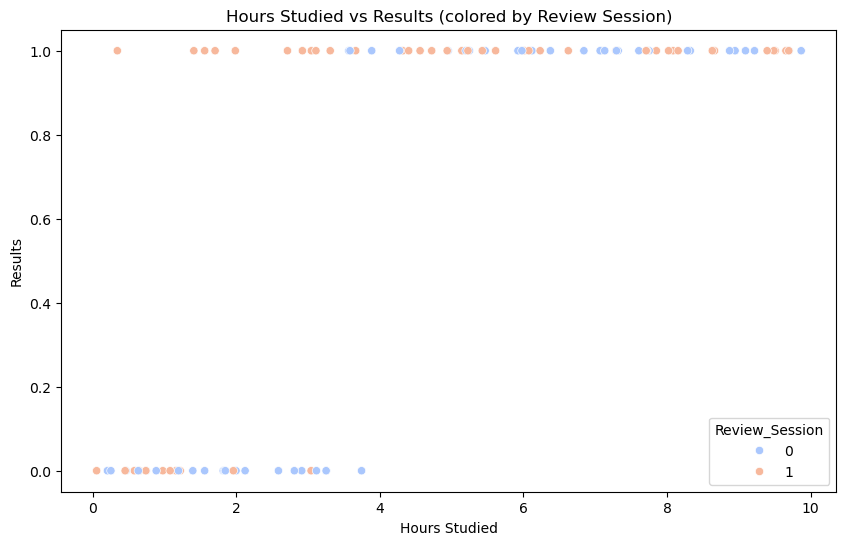

Coefficients: [[1.36542016 1.87797591]]
Intercept: [-4.61373892]
Accuracy: 0.93
AUC: 0.9761029411764706


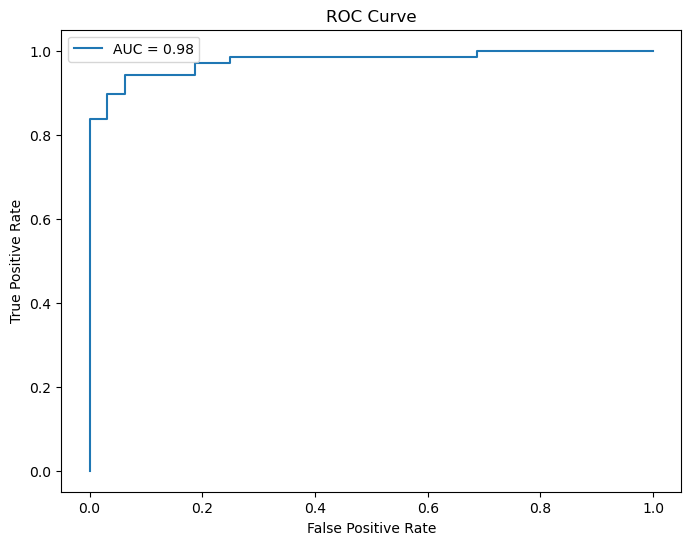

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load the dataset
file_path = r'student_data.csv'
student_data = pd.read_csv(file_path)

# Step 1: Data Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(data=student_data, x='Hours_Studied', y='Results', hue='Review_Session', palette='coolwarm')
plt.title('Hours Studied vs Results (colored by Review Session)')
plt.xlabel('Hours Studied')
plt.ylabel('Results')
plt.show()

# Step 2: Fit Logistic Regression Model
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']

# Create and fit the model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Step 3: Output model coefficients
coefficients = log_reg.coef_
intercept = log_reg.intercept_

# Step 4: Performance metrics
y_pred = log_reg.predict(X)
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, log_reg.predict_proba(X)[:, 1])

# ROC Curve
fpr, tpr, _ = roc_curve(y, log_reg.predict_proba(X)[:, 1])

# Display results
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


## Task 2:  Understanding and Prevent Overfitting in the context of SVM 

Write code to fit a Support Vector Machine model using (1) linear kernel and (2) RBF kernel. For the RBF kernel, use grid search to find the best gamma parameter using k-fold cross-validation. 


In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Step 1: Linear SVM
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X, y)

# Predict and evaluate
y_pred_linear = svm_linear.predict(X)
accuracy_linear = accuracy_score(y, y_pred_linear)
auc_linear = roc_auc_score(y, svm_linear.predict_proba(X)[:, 1])

print(f"Linear SVM Accuracy: {accuracy_linear}")
print(f"Linear SVM AUC: {auc_linear}")

# Step 2: RBF SVM with Grid Search for best gamma parameter
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10]}
svm_rbf = SVC(kernel='rbf', probability=True)
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')

# Fit the model with best gamma
grid_search.fit(X, y)
best_gamma = grid_search.best_params_['gamma']
svm_rbf_best = grid_search.best_estimator_

# Predict and evaluate the RBF SVM
y_pred_rbf = svm_rbf_best.predict(X)
accuracy_rbf = accuracy_score(y, y_pred_rbf)
auc_rbf = roc_auc_score(y, svm_rbf_best.predict_proba(X)[:, 1])

print(f"Best Gamma for RBF SVM: {best_gamma}")
print(f"RBF SVM Accuracy: {accuracy_rbf}")
print(f"RBF SVM AUC: {auc_rbf}")


Linear SVM Accuracy: 0.92
Linear SVM AUC: 0.9820772058823529
Best Gamma for RBF SVM: 0.1
RBF SVM Accuracy: 0.93
RBF SVM AUC: 0.9738051470588235
